# 今回は確率集中不等式で有名なHoeffdingの不等式を実装していきます

Hoeffdingの不等式は以下のようになります
X1, X2,  ..., Xnは独立の確率変数とし, 各X_iのとりうる範囲は[a,b]とし, 平均はμ, X = (X1 + X2 + ... + Xn)/n とすると, どんなε > 0で次の不等式が成り立ちます．
$$
P(|X - \mu| \geq \varepsilon) \leq 2\exp\left(-\frac{2n\varepsilon^2}{(b-a)^2}\right)
$$



**実験で本当にこの不等式が成り立つか確認してみます．**

-----

##### まずは今回使う確率密度関数を表します．
平均を0, 分散を1のような正規分布を想定します．

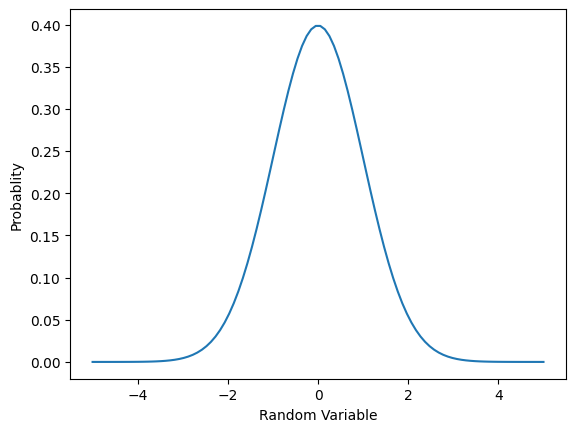

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#確率変数のとりうる範囲
x = np.linspace(-5.0,5.0,100)

#正規分布
y =norm.pdf(x,0,1)
plt.xlabel('Random Variable')
plt.ylabel('Probablity')
plt.plot(x,y)

-------

次にHoeffdingの不等式のバウンドの関数を作ります.

In [4]:
def hoeffding_bound(n: int,epsilon: float):
    return 2 * np.exp(-2*n*epsilon**2 / (10) ** 2)

Hoeffdingの不等式の左式の意味というのは下の図に一致します．

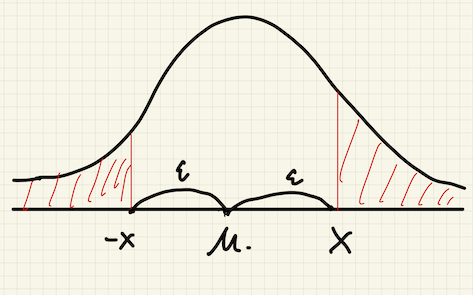

#### 上の赤く塗られた部分が左の式と一致します．
これは上の確率密度関数の累積分布関数を使えば出せそうですね．

In [5]:
def hoeffding_inequality(epsilon: float,n = 100):
    #どの確率変数がイプシロンより大きくなるかを確認するindex
    dif_index = 0
    for i in range(100):
        if x[i] >= epsilon:
            dif_index = i
            break
    #絶対値ついてるから2倍，標準正規分布は0を基準に対象なので．
    left_bound = 2 * (1-y[i])
    right_bound = hoeffding_bound(n,epsilon)
    print(right_bound)
    if left_bound <= right_bound:
        print('Hoeffdingの不等式は成立してます')

In [6]:
hoeffding_inequality(epsilon=0.001)

1.999996000004
Hoeffdingの不等式は成立してます
